# training classifier for audio mnist

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from librosa.feature import melspectrogram

/home/hexagon/miniconda3/envs/tf37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading data
x_train, y_train = tfds.as_numpy(tfds.load("spoken_digit", 
        split="train", 
        shuffle_files=True, 
        batch_size=-1, 
        as_supervised=True))
print(x_train.shape, y_train.shape)

(2500, 18262) (2500,)


2022-06-09 21:28:04.685005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:28:04.712079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:28:04.712236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:28:04.712783: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

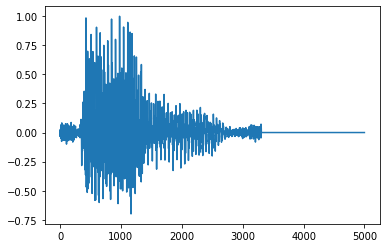

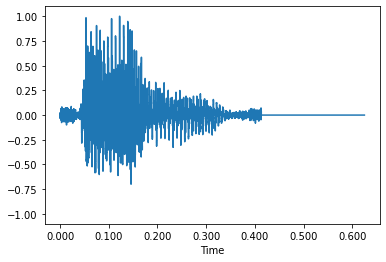

/home/hexagon/miniconda3/envs/tf37/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Pass y=[-0.00584795  0.01949318  0.00682261 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys


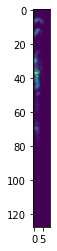

In [13]:
sample = x_train[5][:5000]
sample = sample / np.amax(sample)
plt.plot(sample)
plt.show()
librosa.display.waveshow(sample, sr=8000)
plt.show()
mel_spec = melspectrogram(sample, sr=8000)
plt.imshow(mel_spec)